In [2]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
     th{
        background-color:blueviolet !important;
        text-align:center !important;
        color:white;
    }
     th,td{
        border:0.1px solid black !important;
        text-align:center !important;
        transition:0.2s all liner !important;
        
    }
     td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
     table.tts tr:first-child td:nth-child(2){
        background-color:red !important;
    }
     table.tts tr:nth-child(2) td:last-child{
        background-color:red !important;
    }
</style>

### 5.2.1 深度学习与小数据问题的相关性

&emsp;有时你会听人说,仅在有大量数据可用时,深度学习才有效。这种说法部分正确:深度学  习的一个基本特性就是能够独立地在训练数据中找到有趣的特征,无须人为的特征工程,而这  只在拥有大量训练样本时才能实现。对于输入样本的维度非常高(比如图像)的问题尤其如此。  
&emsp;但对于初学者来说,所谓“大量”样本是相对的,即相对于你所要训练网络的大小和深度  而言。只用几十个样本训练卷积神经网络就解决一个复杂问题是不可能的,但如果模型很小,  并做了很好的正则化,同时任务非常简单,那么几百个样本可能就足够了。由于卷积神经网络  学到的是局部的、平移不变的特征,它对于感知问题可以高效地利用数据。虽然数据相对较少,  但在非常小的图像数据集上从头开始训练一个卷积神经网络,仍然可以得到不错的结果,而且  无须任何自定义的特征工程。本节你将看到其效果。    
&emsp;此外,深度学习模型本质上具有高度的可复用性,比如,已有一个在大规模数据集上训练  的图像分类模型或语音转文本模型,你只需做很小的修改就能将其复用于完全不同的问题。特  别是在计算机视觉领域,许多预训练的模型(通常都是在 ImageNet 数据集上训练得到的)现  在都可以公开下载,并可以用于在数据很少的情况下构建强大的视觉模型。这是 5.3 节的内容。  我们先来看一下数据。

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\20201\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [1]:
import os,shutil

In [2]:
original_dataset_dir = 'data/kaggle_original_data'

In [3]:
base_dir = 'data/cats_and_dogs_small'

####  day2新修

In [2]:
train_dir = 'data/cats_and_dogs_small/train'
validation_dir = 'data/cats_and_dogs_small/validation'
test_dir = 'data/cats_and_dogs_small/test'
train_cats_dir = 'data/cats_and_dogs_small/train/cats'
train_dogs_dir = 'data/cats_and_dogs_small/train/dogs'
validation_cats_dir = 'data/cats_and_dogs_small/validation/cats'
validation_dogs_dir = 'data/cats_and_dogs_small/validation/dogs'
test_cats_dir = 'data/cats_and_dogs_small/test/cats'
test_dogs_dir = 'data/cats_and_dogs_small/test/dogs'

In [7]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

In [8]:
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

In [9]:
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [10]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [11]:
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [12]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [13]:
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [14]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

In [15]:
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [16]:
os.path.join?

Signature: os.path.join(path, *paths)
Docstring: <no docstring>
File:      d:\deepl\<frozen ntpath>
Type:      function

In [17]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join('data/kaggle_original_data/Cat/',fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    

In [18]:
fnames = ['{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join('data/kaggle_original_data/Cat/',fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [19]:
fnames = ['{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join('data/kaggle_original_data/Cat/',fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [20]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join('data/kaggle_original_data/Dog/',fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [21]:
fnames=['{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join('data/kaggle_original_data/Dog/',fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [22]:
fname=['{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join('data/kaggle_original_data/Dog/',fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [3]:
print('total training cat images:',len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [4]:
print('total training dog images:',len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [5]:
print('total validation cat images:',len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [6]:
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


#### 代码清单 5-5 将猫狗分类的小型卷积神经网络实例化

In [9]:
from keras import layers,models,Input

In [10]:
model = models.Sequential()
model.add(Input(shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2))) 
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 148, 148, 32)   │          896 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 74, 74, 32)     │            0 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 72, 72, 64)     │       18,496 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 36, 36, 64)     │            0 │
│ (MaxPooling2D)                │                        │              │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 34, 34, 128)    │       73,856 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 17, 17, 128)    │            0 │
│ (MaxPooling2D)                │                        │              │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 15, 15, 128)    │      147,584 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 7, 7, 128)      │            0 │
│ (MaxPooling2D)                │                        │              │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 6272)           │            0 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 512)            │    3,211,776 │
├───────────────────────────────┼────────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)              │          513 │
└───────────────────────────────┴────────────────────────┴──────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

#### 代码清单5-6 配置模型用于训练

In [13]:
from keras import optimizers

In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

### 5.2.4 数据预处理

你现在已经知道,将数据输入神经网络之前,应该将数据格式化为经过预处理的浮点数张量。  现在,数据以 JPEG 文件的形式保存在硬盘中,所以数据预处理步骤大致如下。  
(1) 读取图像文件。   
(2) 将 JPEG 文件解码为 RGB 像素网格。    
(3) 将这些像素网格转换为浮点数张量。   
(4) 将像素值(0~255 范围内)缩放到 [0, 1] 区间(正如你所知,神经网络喜欢处理较小的输  入值)。  
这些步骤可能看起来有点吓人,但幸运的是,Keras 拥有自动完成这些步骤的工具。Keras  有 一 个 图 像 处 理 辅 助 工 具 的 模 块, 位 于 keras.preprocessing.image。 特 别 地, 它 包 含  ImageDataGenerator 类,可以快速创建 Python 生成器,能够将硬盘上的图像文件自动转换  为预处理好的张量批量。下面我们将用到这个类。

#### 代码清单 5-7 使用 ImageDataGenerator 从目录中读取图像

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20, 
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


我们来看一下其中一个生成器的输出:它生成了 150×150 的 RGB 图像[形状为 (20,  150, 150, 3)]与二进制标签[形状为 (20,)]组成的批量。每个批量中包含 20 个样本(批  量大小)。注意,生成器会不停地生成这些批量,它会不断循环目标文件夹中的图像。因此,你  需要在某个时刻终止(break)迭代循环。

In [20]:
for data_batch,labels_batch in train_generator:
    print('data batch shape',data_batch.shape)
    print('labels batch shape',labels_batch.shape)
    break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


```python
>>> for data_batch, labels_batch in train_generator:
    >>> print('data batch shape:', data_batch.shape) 
    >>> print('labels batch shape:', labels_batch.shape) 
    >>> break
data batch shape: (20, 150, 150, 3) labels batch shape: (20,)
```

&ensp;&ensp;利用生成器,我们让模型对数据进行拟合。我们将使用 fit_generator 方法来拟合,它  在数据生成器上的效果和 fit 相同。它的第一个参数应该是一个 Python 生成器,可以不停地生  成输入和目标组成的批量,比如 train_generator。因为数据是不断生成的,所以 Keras 模型  要知道每一轮需要从生成器中抽取多少个样本。这是 steps_per_epoch 参数的作用:从生成  器中抽取 steps_per_epoch 个批量后(即运行了steps_per_epoch 次梯度下降),拟合过程  将进入下一个轮次。本例中,每个批量包含 20 个样本,所以读取完所有 2000 个样本需要 100  个批量。  
&ensp;&ensp;使用 fit_generator 时,你可以传入一个 validation_data 参数,其作用和在 fit 方  法中类似。值得注意的是,这个参数可以是一个数据生成器,但也可以是 Numpy 数组组成的元  组。如果向 validation_data 传入一个生成器,那么这个生成器应该能够不停地生成验证数  据批量,因此你还需要指定 validation_steps 参数,说明需要从验证生成器中抽取多少个批  次用于评估。

#### 代码清单 5-8 利用批量生成器拟合模型

In [24]:
history = model.fit(
            train_generator,
            epochs=30,
            validation_data=validation_generator,
            steps_per_epoch=100,
            validation_steps=50,
        )

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.5550 - loss: 0.6808 - val_accuracy: 0.5190 - val_loss: 0.6715
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 455ms/step - accuracy: 0.6129 - loss: 0.6491 - val_accuracy: 0.6480 - val_loss: 0.6321
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 412ms/step - accuracy: 0.6732 - loss: 0.6086 - val_accuracy: 0.6560 - val_loss: 0.6031
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 634ms/step - accuracy: 0.7077 - loss: 0.5671 - val_accuracy: 0.6850 - val_loss: 0.5913
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 609ms/step - accuracy: 0.7146 - loss: 0.5461 - val_accuracy: 0.6680 - val_loss: 0.6055
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 531ms/step - accuracy: 0.7107 - loss: 0.5310 - val_accuracy: 0.6990 - val_loss: 0.5784
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 661ms/step - accuracy: 0.7525 - loss: 0.5027 - val_accuracy: 0.7000 - val_loss: 0.5611
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 386ms/step - accuracy: 0.7493 - loss: 0

始终在训练完成后保存模型,这是一种良好实践。

#### 代码清单 5-9 保存模型

In [26]:
model.save('cats_and_dogs_small_1.keras') 

我们来分别绘制训练过程中模型在训练数据和验证数据上的损失和精度(见图 5-9 和图 5-10)

#### 代码清单 5-10 绘制训练过程中的损失曲线和精度曲线

In [27]:
import matplotlib.pyplot as plt 

In [28]:
acc = history.history['accuracy']

In [29]:
val_acc = history.history['val_accuracy']

In [30]:
loss = history.history['loss']

In [31]:
val_loss = history.history['val_loss']

In [32]:
epochs = range(1,len(acc)+1)

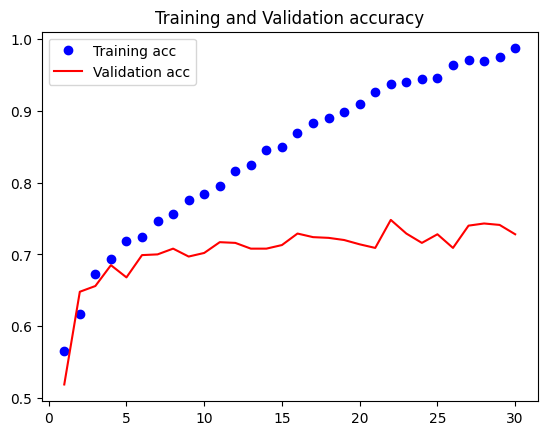

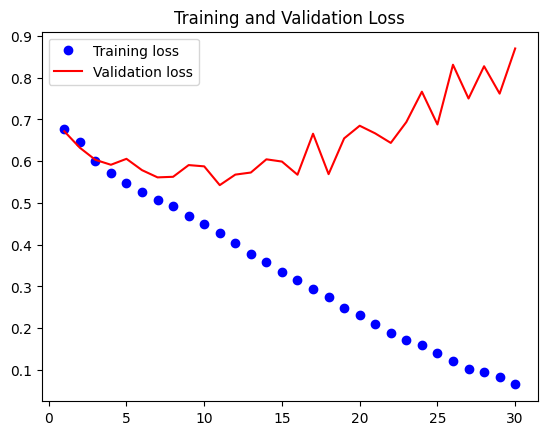

In [33]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure() 
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend() 
plt.show()

从这些图像中都能看出过拟合的特征。训练精度随着时间线性增加,直到接近 100%,而验  证精度则停留在 70%~72%。验证损失仅在 5 轮后就达到最小值,然后保持不变,而训练损失则  一直线性下降,直到接近于 0。  因为训练样本相对较少(2000 个),所以过拟合是你最关心的问题。前面已经介绍过几种  降低过拟合的技巧,比如 dropout 和权重衰减(L2 正则化)。现在我们将使用一种针对于计算  机视觉领域的新方法,在用深度学习模型处理图像时几乎都会用到这种方法,它就是数据增强  (data augmentation)

### 5.2.5 使用数据增强

过拟合的原因是学习样本太少,导致无法训练出能够泛化到新数据的模型。如果拥有无限  的数据,那么模型能够观察到数据分布的所有内容,这样就永远不会过拟合。数据增强是从现  有的训练样本中生成更多的训练数据,其方法是利用多种能够生成可信图像的随机变换来增加  (augment)样本。其目标是,模型在训练时不会两次查看完全相同的图像。这让模型能够观察  到数据的更多内容,从而具有更好的泛化能力。  在 Keras 中,这可以通过对 ImageDataGenerator 实例读取的图像执行多次随机变换来实  现。我们先来看一个例子

#### 代码清单 5-11 利用 ImageDataGenerator 来设置数据增强

In [34]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

这里只选择了几个参数(想了解更多参数,请查阅 Keras 文档)。我们来快速介绍一下这些  参数的含义。    
- rotation_range 是角度值(在 0~180 范围内),表示图像随机旋转的角度范围。
- width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围(相对于总宽  度或总高度的比例)。
- shear_range 是随机错切变换的角度。
- zoom_range 是图像随机缩放的范围。
- horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设(比如真  实世界的图像),这种做法是有意义的。
-  fill_mode 是用于填充新创建像素的方法,这些新像素可能来自于旋转或宽度 / 高度平移。  我们来看一下增强后的图像(见图 5-11)。

#### 代码清单 5-12 显示几个随机增强后的训练图像

In [35]:
from keras.preprocessing import image

In [36]:
fnames = [os.path.join(train_cats_dir,fname) 
         for fname in os.listdir(train_cats_dir)]

In [37]:
img_path = fnames[3] 
img = image.load_img(img_path,target_size=(150,150)) 

In [38]:
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

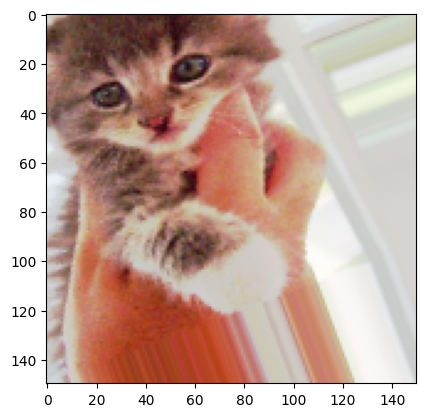

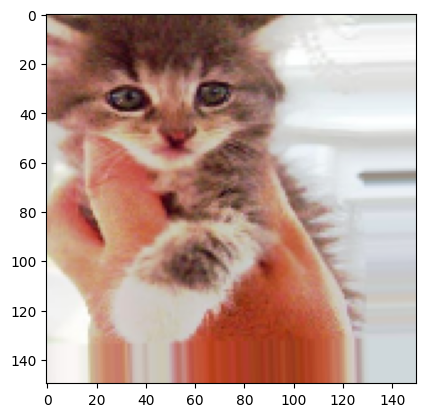

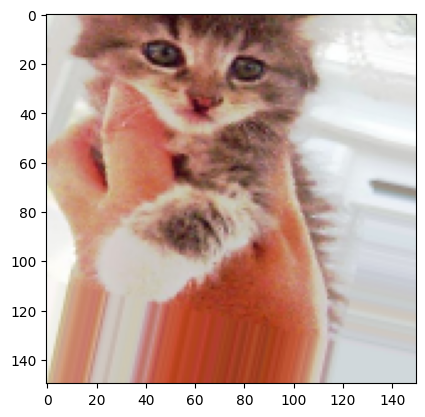

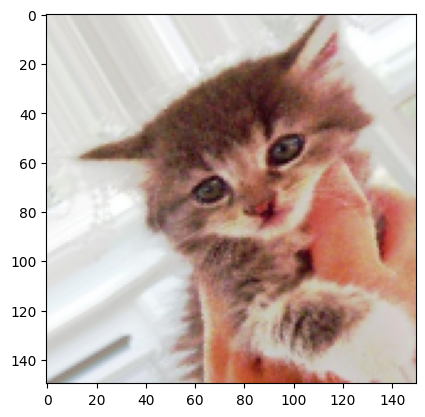

In [39]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i) 
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0: 
        break
plt.show()

果你使用这种数据增强来训练一个新网络,那么网络将不会两次看到同样的输入。但网  络看到的输入仍然是高度相关的,因为这些输入都来自于少量的原始图像。你无法生成新信息,  而只能混合现有信息。因此,这种方法可能不足以完全消除过拟合。为了进一步降低过拟合,  你还需要向模型中添加一个 Dropout 层,添加到密集连接分类器之前。

#### 代码清单 5-13 定义一个包含 dropout 的新卷积神经网络

In [40]:
model = models.Sequential() 
model.add(Input(shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2)) 
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2)) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [41]:
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(learning_rate=1e-4), 
    metrics=['accuracy']
)

#### 代码清单 5-14 利用数据增强生成器训练卷积神经网络

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150), 
    batch_size=32, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [45]:
validation_generator=test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150), 
    batch_size=32, 
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [46]:
history = model.fit(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100,
    validation_data = validation_generator, 
    validation_steps=50
)

D:\Envs\dl\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
 63/100 ━━━━━━━━━━━━━━━━━━━━ 17s 471ms/step - accuracy: 0.4839 - loss: 0.6978

D:\Envs\dl\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 368ms/step - accuracy: 0.4854 - loss: 0.6972 - val_accuracy: 0.5190 - val_loss: 0.6913
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 653ms/step - accuracy: 0.5232 - loss: 0.6903 - val_accuracy: 0.5950 - val_loss: 0.6850
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 609ms/step - accuracy: 0.5390 - loss: 0.6895 - val_accuracy: 0.6030 - val_loss: 0.6775
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 500ms/step - accuracy: 0.5511 - loss: 0.6803 - val_accuracy: 0.5010 - val_loss: 0.7287
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 466ms/step - accuracy: 0.5516 - loss: 0.6783 - val_accuracy: 0.6080 - val_loss: 0.6541
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 523ms/step - accuracy: 0.6000 - loss: 0.6621 - val_accuracy: 0.5950 - val_loss: 0.6506
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 591ms/step - accuracy: 0.5901 - loss: 0.6592 - val_accuracy: 0.5430 - val_loss: 0.6854
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 631ms/step - accuracy: 0.5911 - loss: 0.662

#### 代码清单 5-15 保存模型

In [47]:
model.save('cats_and_dogs_small_2.keras')